In [34]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import networkx as nx

In [2]:
#ecoli protein files.
with open('ecoli_uniq_rem.fasta','r') as f:
    name = f.readlines()
    name=[x.strip() for x in name]

In [5]:
#create a easier/accessible dictionary file, keys: name; values: sequence length
dicts={}
for i in range(len(name)):
    if i%2==0:
        string=re.search('\|(.+?)\|',name[i])
        dicts[string.group(1)] = len(name[i+1])

In [8]:
#rbh.m8 is the output of running reciprocal best hit procedure. The file is formatted as a tab-separated list with 
#12 columns:(1,2) identifiers for query and target sequences/

df=pd.read_csv('rbh.m8',delimiter='\t',header=None)
df.columns=['Qid','Tid','SI','aliLEN','mismatch','gap','q_sta','q_end','t_sta','t_end','evalue','bitscore']

In [16]:
def query_len(data):
    return dicts.get(data['Qid'])

In [17]:
df['q_len']=df.apply(query_len,axis=1)

In [62]:
df[df['aliLEN']>df['q_len']]

,Qid,Tid,SI,aliLEN,mismatch,gap,q_sta,q_end,t_sta,t_end,evalue,bitscore,q_len
35,P0C058,Q329C7,0.964,144,5,0,0,144,0,142,3.346000e-93,294,142
46,P76540,Q32DB5,0.939,168,10,0,0,168,0,166,3.891000e-106,333,166
58,P76164,A0A0G3Q3V7,0.213,446,38,0,0,446,0,49,4.906000e-26,110,49
93,P46478,D2TND9,0.867,79,9,0,0,79,0,67,1.481000e-42,145,67
171,P0ADE2,Q328C0,0.819,81,12,0,0,81,0,68,1.376000e-40,139,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6780,P75747,Q32IL8,0.919,353,28,0,0,353,0,348,7.472000e-223,680,348
6781,P75747,A0A0H2VTB8,0.897,363,36,0,0,363,0,348,1.189000e-222,680,348
6791,P78055,A0A0H2UY68,0.850,244,33,0,0,244,0,220,1.086000e-138,431,220
6824,P76129,A0A0V9JT38,0.769,801,184,0,0,801,0,799,0.000000e+00,1255,799


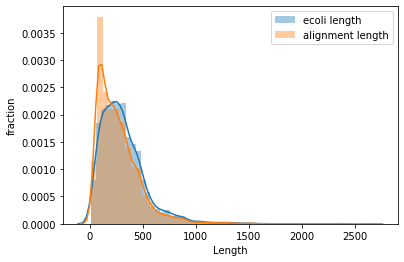

In [45]:
#distribution of ecoli length and alignment length 
fig1, ax=plt.subplots()
sns.distplot(list(dicts.values()),ax=ax,label='ecoli length')
sns.distplot(df['aliLEN'],ax=ax,label='alignment length')
ax.legend()
ax.set(xlabel='Length', ylabel='fraction')
fig1.savefig('length.jpg')

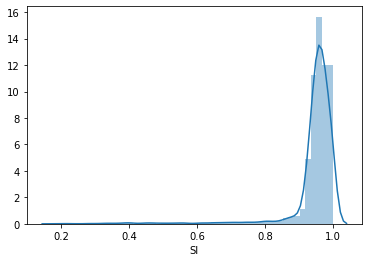

In [66]:
#plot the distribution of sequence identity
sns.distplot(df['SI'])
ax.set(xlabel='SI', ylabel='numbers')
df['SI'].mean(),df['SI'].std()
plt.savefig('si_dist.jpg')

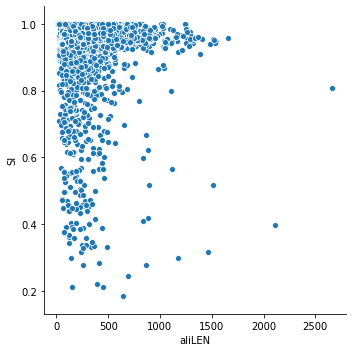

In [67]:
#plot alignment length vs sequence identity.
sns.relplot(x='aliLEN',y='SI',data=df)
plt.savefig('alignVSsi.jpg')

/home/wzhu/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


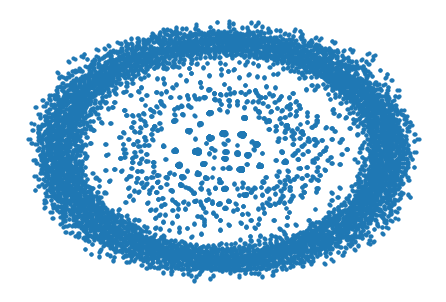

In [68]:
network_df=df.iloc[:, 0:2] 
network=nx.from_pandas_edgelist(network_df,source='Qid', target='Tid')
nx.draw(network,node_size=10,edge_color='gray')
plt.savefig('network1.jpg')